In [16]:
import pandas as pd
import os
import sys
import numpy as np
sys.path.append("..")
from iotools import expressionTools as eT

gx_basedir = "/cbscratch/franco/trans-eqtl/new_preprocess_feb2020_freeze/gtex_v8/expression/"
tissues = ["haa", "pan", "spl", "wb"]

In [23]:
tissue      = tissues[3]
gx_basename = f"{tissue}_tpms_qcfilter.txt.protein_coding_lncRNA_filtered"
gx_file     = os.path.join(gx_basedir, "tpms", gx_basename)

expr_tpms = pd.read_csv(gx_file, sep="\t", header=0, index_col=0)
expr_qn   = eT.quant_normalize_expr(expr_tpms)

/usr/users/fsimone/opt/miniconda/3/envs/pyenv37/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (670). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


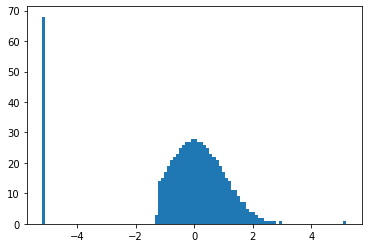

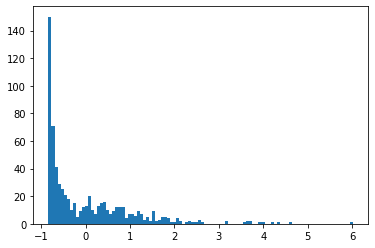

In [24]:
import matplotlib.pyplot as plt

i=10
plt.hist(expr_qn.iloc[i,:], bins=100, label="qn")
plt.show()

plt.hist(expr_tpms.iloc[i,:], bins=100, label="tpms")
plt.show()

as
read gx


/usr/users/fsimone/opt/miniconda/3/envs/pyenv37/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (581). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


knn
(15673, 581) (15673, 581)
svd1
svd2
svd3
svd4
ms
read gx


/usr/users/fsimone/opt/miniconda/3/envs/pyenv37/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (706). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


knn
(13236, 706) (13236, 706)
svd1
svd2
svd3
svd4
sse
read gx


/usr/users/fsimone/opt/miniconda/3/envs/pyenv37/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (605). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


knn
(16203, 605) (16203, 605)
svd1
svd2
svd3
svd4
aa
read gx


/usr/users/fsimone/opt/miniconda/3/envs/pyenv37/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (387). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


knn
(15064, 387) (15064, 387)
svd1
svd2
svd3
svd4


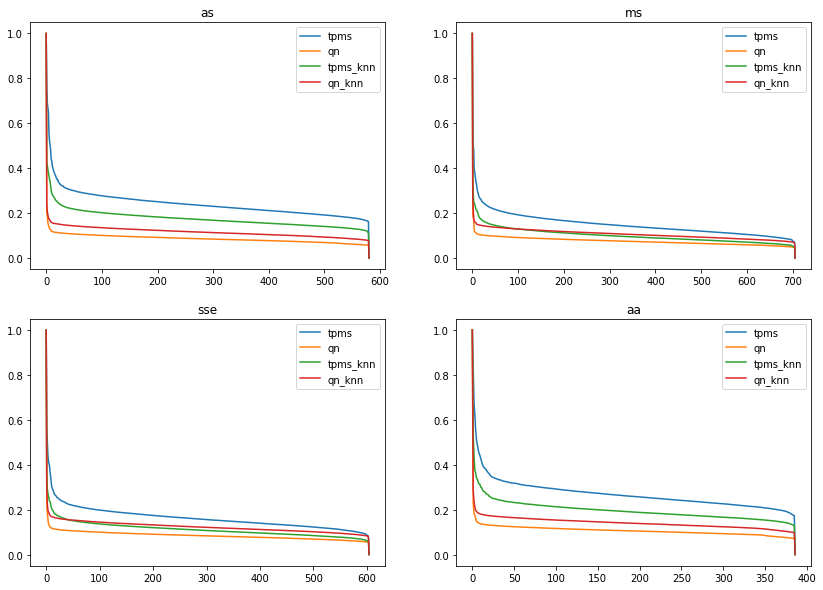

In [39]:

sel_tissues = ["as", "ms", "sse", "aa"]
nrow = 2
ncol = 2
fig = plt.figure(figsize=(7*ncol,5*nrow))
for i, ts in enumerate(sel_tissues):
    print(ts)
    ax = fig.add_subplot(nrow, ncol, i+1)

    gx_basename = f"{ts}_tpms_qcfilter.txt.protein_coding_lncRNA_filtered"
    gx_file     = os.path.join(gx_basedir, "tpms", gx_basename)

    expr_tpms = pd.read_csv(gx_file, sep="\t", header=0, index_col=0)
    expr_qn   = eT.quant_normalize_expr(expr_tpms)
    expr_tpms_knn = eT.knn_correction(expr_tpms.values.T, dosage=None, K=30).T
    expr_qn_knn   = eT.knn_correction(expr_qn.values.T, dosage=None, K=30).T
    
    print(expr_tpms.shape, expr_tpms_knn.shape)

    _u, s_tpms, _vt = np.linalg.svd(expr_tpms.values.T, full_matrices=False)
    _u, s_qn, _vt = np.linalg.svd(expr_qn.values.T, full_matrices=False)
    _u, s_tpms_knn, _vt = np.linalg.svd(expr_tpms_knn.T, full_matrices=False)
    _u, s_qn_knn, _vt = np.linalg.svd(expr_qn_knn.T, full_matrices=False)
    
    S_tpms = s_tpms / np.max(s_tpms)
    S_qn = s_qn / np.max(s_qn)
    S_tpms_knn = s_tpms_knn / np.max(s_tpms_knn)
    S_qn_knn = s_qn_knn / np.max(s_qn_knn)

    ax.plot(S_tpms, label="tpms")
    ax.plot(S_qn, label="qn")
    ax.plot(S_tpms_knn, label="tpms_knn")
    ax.plot(S_qn_knn, label="qn_knn")
    ax.set_title(ts)
    ax.legend()
    
plt.show()


haa


/usr/users/fsimone/opt/miniconda/3/envs/pyenv37/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (372). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


pan


/usr/users/fsimone/opt/miniconda/3/envs/pyenv37/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (305). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


spl


/usr/users/fsimone/opt/miniconda/3/envs/pyenv37/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (227). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


wb


/usr/users/fsimone/opt/miniconda/3/envs/pyenv37/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (670). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


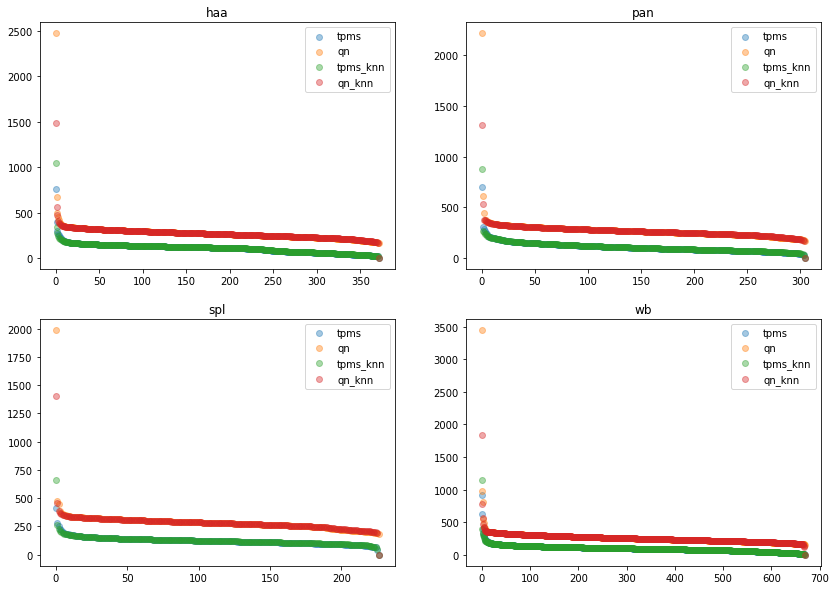

In [43]:

sel_tissues = ["haa", "pan", "spl", "wb"]
nrow = 2
ncol = 2
fig = plt.figure(figsize=(7*ncol,5*nrow))
for i, ts in enumerate(sel_tissues):
    print(ts)
    ax = fig.add_subplot(nrow, ncol, i+1)

    gx_basename = f"{ts}_tpms_qcfilter.txt.protein_coding_lncRNA_filtered"
    gx_file     = os.path.join(gx_basedir, "tpms", gx_basename)

    expr_tpms = pd.read_csv(gx_file, sep="\t", header=0, index_col=0)
    expr_qn   = eT.quant_normalize_expr(expr_tpms)
    expr_tpms_knn = eT.knn_correction(expr_tpms.values.T, dosage=None, K=30).T
    expr_qn_knn   = eT.knn_correction(expr_qn.values.T, dosage=None, K=30).T
    
    _u, s_tpms, _vt = np.linalg.svd(expr_tpms.values.T, full_matrices=False)
    _u, s_qn, _vt = np.linalg.svd(expr_qn.values.T, full_matrices=False)
    _u, s_tpms_knn, _vt = np.linalg.svd(expr_tpms_knn.T, full_matrices=False)
    _u, s_qn_knn, _vt = np.linalg.svd(expr_qn_knn.T, full_matrices=False)
    
    S_tpms = s_tpms / np.max(s_tpms)
    S_qn = s_qn / np.max(s_qn)
    S_tpms_knn = s_tpms_knn / np.max(s_tpms_knn)
    S_qn_knn = s_qn_knn / np.max(s_qn_knn)

#     ax.plot(S_tpms, label="tpms")
#     ax.plot(S_qn, label="qn")
#     ax.plot(S_tpms_knn, label="tpms_knn")
#     ax.plot(S_qn_knn, label="qn_knn")
    xpos = np.arange(len(s_tpms))
    ax.scatter(xpos, s_tpms, label="tpms", alpha=0.4)
    ax.scatter(xpos, s_qn, label="qn", alpha=0.4)
    ax.scatter(xpos, s_tpms_knn, label="tpms_knn", alpha=0.4)
    ax.scatter(xpos, s_qn_knn, label="qn_knn", alpha=0.4)
    ax.set_title(ts)
    ax.legend()

plt.savefig("plots/bad_tissues_svds.png", dpi=300, bbox_inches='tight')
plt.show()


# Subset samples by ancestry


In [48]:
master_samplefile = "/cbscratch/franco/datasets/gtex_v8/genotypes/sample_files/gtex_v8_eur.list"
sampledir = "/cbscratch/franco/datasets/gtex_v8/genotypes/sample_files"

def read_samples(filepath):
    with open(filepath) as instr:
        samp_list = [x.rstrip() for x in instr.readlines()]
    return samp_list

haa
pan
spl
wb


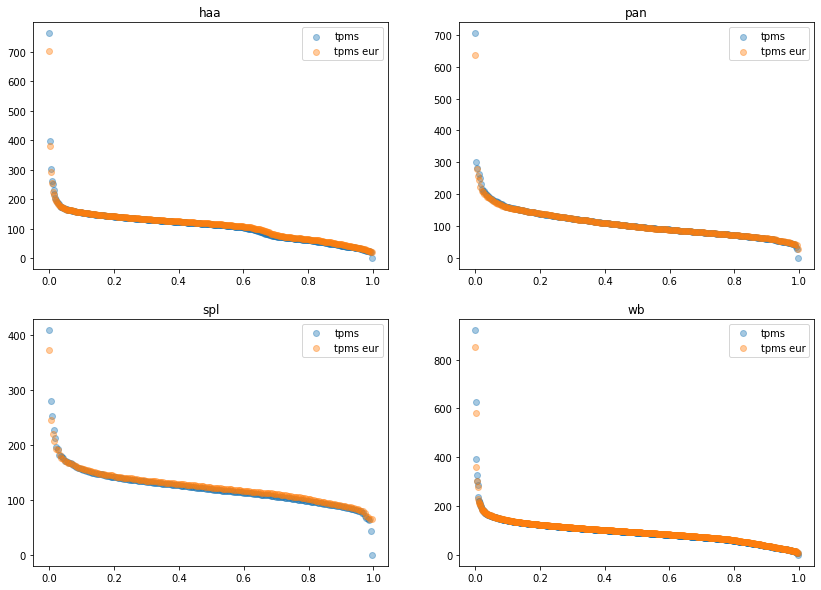

In [52]:
sel_tissues = ["haa", "pan", "spl", "wb"]
nrow = 2
ncol = 2
fig = plt.figure(figsize=(7*ncol,5*nrow))
for i, ts in enumerate(sel_tissues):
    print(ts)
    ax = fig.add_subplot(nrow, ncol, i+1)

    sample_base = f"gtex_v8_{ts}_eur.list"
    filepath    = os.path.join(sampledir, sample_base)
    samples     = read_samples(filepath)
    gx_basename = f"{ts}_tpms_qcfilter.txt.protein_coding_lncRNA_filtered"
    gx_file     = os.path.join(gx_basedir, "tpms", gx_basename)

    expr_tpms = pd.read_csv(gx_file, sep="\t", header=0, index_col=0)
    expr_eur  = expr_tpms[samples]
    
    _u, s_tpms, _vt = np.linalg.svd(expr_tpms.values.T, full_matrices=False)
    _u, s_eur, _vt = np.linalg.svd(expr_eur.values.T, full_matrices=False)

    S_tpms = s_tpms / np.max(s_tpms)
    S_eur  = s_eur  / np.max(s_eur)

    xpos     = np.arange(len(s_tpms))/ len(s_tpms)
    xpos_eur = np.arange(len(s_eur)) / len(s_eur)
    ax.scatter(xpos    , s_tpms, label="tpms", alpha=0.4)
    ax.scatter(xpos_eur, s_eur, label="tpms eur", alpha=0.4)
    ax.set_title(ts)
    ax.legend()

plt.savefig("plots/bad_tissues_svds_EUR.png", dpi=300, bbox_inches='tight')
plt.show()


In [57]:
## Write some expression files with EUR only

sel_tissues = ["haa", "pan", "spl", "wb"]
for i, ts in enumerate(sel_tissues):
    print(ts)
    sample_base = f"gtex_v8_{ts}_eur.list"
    filepath    = os.path.join(sampledir, sample_base)
    samples     = read_samples(filepath)
    gx_basename = f"{ts}_tpms_qcfilter.txt.protein_coding_lncRNA_filtered"
    gx_file     = os.path.join(gx_basedir, "tpms", gx_basename)

    expr_tpms = pd.read_csv(gx_file, sep="\t", header=0, index_col=0)
    expr_eur  = expr_tpms[samples]
    expr_eur.to_csv(f"expr_files/{ts}_tpms_EUR.txt", sep="\t")

haa
pan
spl
wb
